Aim of this notebook is to run the UC notebook (UC_geothermal.ipynb) which is built to solve a UC dispatch of 24-hours, for a whole year or shorter if desired and collate results. Right now I am treating each day UC as independent instances and solve them parallely, meaning the commitment statuses of the generators at the end of a day are not taken into account for the nect run. This is so as to simplify computation and make use of parallelization. 

In [17]:
import papermill as pm                               #to parameterize and execute across jupyter notebooks
import pandas as pd
import os
from concurrent.futures import ThreadPoolExecutor    #for parallelization
import numpy as np
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from tabulate import tabulate

path=os.getcwd()                #path to notebook directory
master_df = pd.DataFrame()      #DataFrame where GEN_{g,t} results, etc from all generators for each day are concatenated
master_cost_of_elec=pd.DataFrame() 
master_results_zz=pd.DataFrame() 
master_summary_by_tech_zz=pd.DataFrame()
master_resup=pd.DataFrame()
master_resdn=pd.DataFrame()

p=0.4                           #Percentage fraction of VRE in capacity = % of [Cap_{Solar}+Cap_{Wind}] in net capacity

def run_instance(n):
    print(f"Running instance for n = {n}")
    output_path_for_this_run = f"output_notebook_{n}.ipynb"
    pm.execute_notebook(
        path+"/UC_geothermal.ipynb",
        output_path_for_this_run,
        parameters={'n': n, 'p': p}
    )
    # Read in the transposed_df that was saved in the executed notebook at each instance
    transposed_df = pd.read_csv(f'transposed_df_{n}.csv', index_col=0)
    cost_of_elec=pd.read_csv(f'cost_of_elec_{n}.csv', index_col=0)
    results=pd.read_csv(f'results_{n}.csv', index_col=0)
    summary_by_tech=pd.read_csv(f'summary_by_tech_{n}.csv', index_col=0)
    resup=pd.read_csv(f'resup_{n}.csv', index_col=0)
    resdn=pd.read_csv(f'resdn_{n}.csv', index_col=0)
    
    # Delete the temporary files
    os.remove(f'results_{n}.csv')
    os.remove(f'summary_by_tech_{n}.csv')
    os.remove(f'transposed_df_{n}.csv')
    os.remove(f'cost_of_elec_{n}.csv')
    os.remove(f'resup_{n}.csv')
    os.remove(f'resdn_{n}.csv')
    os.remove(output_path_for_this_run)

    return transposed_df, cost_of_elec, results, summary_by_tech, resup, resdn


#Run instances
"""Note that the resolution of data is hourly, so 24 hours is 1 day. Below start_day and end_day are used to define 
T_period = range(n * 24 + 1, (n + 1) * 24 + 1), which chooses correctly the beginning and ending 'hour' corresponding to the 
day we want to start running the UC from"""

#Note goes from 0:364 for a year

start_day=0
end_day=30

with ThreadPoolExecutor() as executor:
    results = list(executor.map(run_instance,list(range(start_day, end_day+1))))

#Collect results
for result in results:
    transposed_df, cost_of_elec, results, summary_by_tech, resup, resdn = result
    master_df = pd.concat([master_df, transposed_df], ignore_index=True)
    master_cost_of_elec = pd.concat([master_cost_of_elec, cost_of_elec], ignore_index=True)
    master_results_zz = pd.concat([master_results_zz, results], ignore_index=True)
    master_summary_by_tech_zz = pd.concat([master_summary_by_tech_zz, summary_by_tech], ignore_index=True)
    master_resup = pd.concat([master_resup, resup], ignore_index=True)
    master_resdn = pd.concat([master_resdn, resdn], ignore_index=True)


master_df.to_csv('results/all_results.csv')
master_cost_of_elec.to_csv('results/elec_cost.csv')
master_results_zz.to_csv('results/master_results_zz.csv')
master_summary_by_tech_zz.to_csv('results/master_summary_by_tech_zz.csv')
master_resup.to_csv('results/master_resup.csv')
master_resdn.to_csv('results/master_resdn.csv')

Running instance for n = 0
Running instance for n = 1
Running instance for n = 2
Running instance for n = 3
Running instance for n = 4Running instance for n = 5

Running instance for n = 6
Running instance for n = 7
Running instance for n = 8
Running instance for n = 9
Running instance for n = 10
Running instance for n = 11
Running instance for n = 12
Running instance for n = 13


Executing:   0%|          | 0/17 [00:00<?, ?cell/s]

Executing:   0%|          | 0/17 [00:00<?, ?cell/s]

Executing:   0%|          | 0/17 [00:00<?, ?cell/s]

Executing:   0%|          | 0/17 [00:00<?, ?cell/s]

Executing:   0%|          | 0/17 [00:00<?, ?cell/s]

Executing:   0%|          | 0/17 [00:00<?, ?cell/s]

Executing:   0%|          | 0/17 [00:00<?, ?cell/s]

Executing:   0%|          | 0/17 [00:00<?, ?cell/s]

Executing:   0%|          | 0/17 [00:00<?, ?cell/s]

Executing:   0%|          | 0/17 [00:00<?, ?cell/s]

Executing:   0%|          | 0/17 [00:00<?, ?cell/s]

Executing:   0%|          | 0/17 [00:00<?, ?cell/s]

Executing:   0%|          | 0/17 [00:00<?, ?cell/s]

Executing:   0%|          | 0/17 [00:00<?, ?cell/s]

Running instance for n = 14
Running instance for n = 15
Running instance for n = 16
Running instance for n = 17


Executing:   0%|          | 0/17 [00:00<?, ?cell/s]

Running instance for n = 18
Running instance for n = 19
Running instance for n = 20
Running instance for n = 21


Executing:   0%|          | 0/17 [00:00<?, ?cell/s]

Running instance for n = 22
Running instance for n = 23


Executing:   0%|          | 0/17 [00:00<?, ?cell/s]

Executing:   0%|          | 0/17 [00:00<?, ?cell/s]

Executing:   0%|          | 0/17 [00:00<?, ?cell/s]

Executing:   0%|          | 0/17 [00:00<?, ?cell/s]

Executing:   0%|          | 0/17 [00:00<?, ?cell/s]

Executing:   0%|          | 0/17 [00:00<?, ?cell/s]

Executing:   0%|          | 0/17 [00:00<?, ?cell/s]

Executing:   0%|          | 0/17 [00:00<?, ?cell/s]

Running instance for n = 24
Running instance for n = 25
Running instance for n = 26


Executing:   0%|          | 0/17 [00:00<?, ?cell/s]

Executing:   0%|          | 0/17 [00:00<?, ?cell/s]

Executing:   0%|          | 0/17 [00:00<?, ?cell/s]

Running instance for n = 27


Executing:   0%|          | 0/17 [00:00<?, ?cell/s]

Running instance for n = 28
Running instance for n = 29
Running instance for n = 30


Executing:   0%|          | 0/17 [00:00<?, ?cell/s]

Executing:   0%|          | 0/17 [00:00<?, ?cell/s]

Executing:   0%|          | 0/17 [00:00<?, ?cell/s]

In [19]:
#below temp isolates columns of interest
temp=master_df[["geothermal","actual_wind", "natural_gas_fired_combined_cycle","actual_solar"]]

#computes % of each generator's generationf rom overall (PLEASE CHECK FOR ACCURACY)
genresulttable= 100 * temp.sum() / (temp.sum().sum())   
print("Generation percentage by resource annually: \n", tabulate(genresulttable.reset_index(), headers='keys', tablefmt='fancy_grid'))
print("Net curtailment across length of time horizon:", master_df["curtail"].sum())
print("Average electricity price:",master_cost_of_elec['total_cost_$_per_mwh'].mean())

Generation percentage by resource annually: 
 ╒════╤══════════════════════════════════╤═════════╕
│    │ index                            │       0 │
╞════╪══════════════════════════════════╪═════════╡
│  0 │ geothermal                       │ 69.2511 │
├────┼──────────────────────────────────┼─────────┤
│  1 │ actual_wind                      │ 14.0132 │
├────┼──────────────────────────────────┼─────────┤
│  2 │ natural_gas_fired_combined_cycle │  0      │
├────┼──────────────────────────────────┼─────────┤
│  3 │ actual_solar                     │ 16.7357 │
╘════╧══════════════════════════════════╧═════════╛
Net curtailment across length of time horizon: 3.567035555818166e-12
Average electricity price: 3.5397728082192


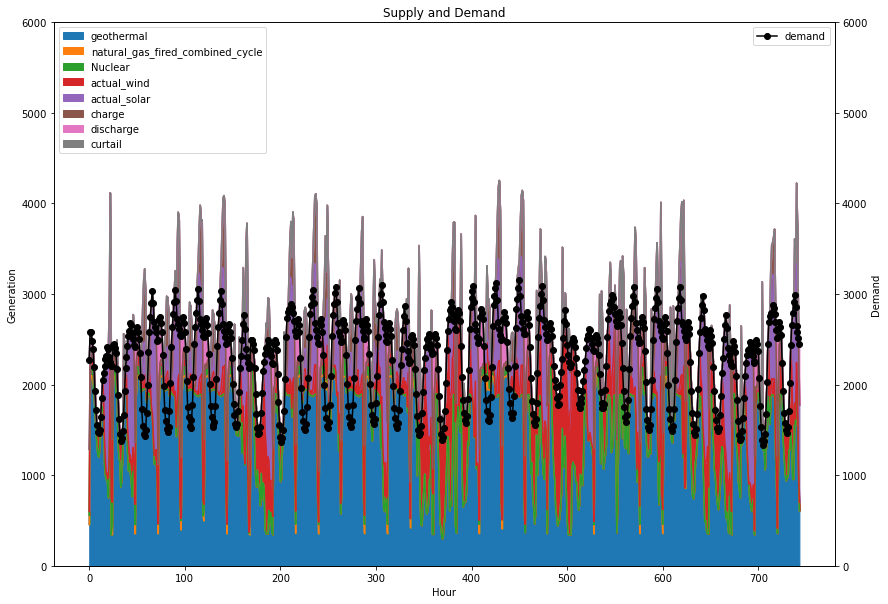

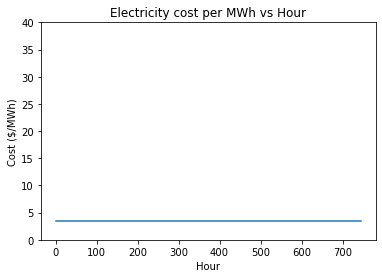

In [20]:
#Cumilative generation stackplot

plottable=master_df[["geothermal", "natural_gas_fired_combined_cycle", "Nuclear", "actual_wind","actual_solar","charge","discharge","curtail"]]

# sets the figure size
fig, ax1 = plt.subplots(figsize=(14, 10))

# Plot the stacked area chart
plottable.abs().plot.area(stacked=True, ax=ax1) #NOTE: Plots only abs() values of generations for charge/discharge plotting

# Create a twin axes sharing the x-axis
ax2 = ax1.twinx()

# Plot the load column on the secondary y-axis
master_df['demand'].plot(ax=ax2, color='black', marker='o')

# Set labels and title
ax1.set_xlabel('Hour')
ax1.set_ylabel('Generation')
ax2.set_ylabel('Demand')
plt.title('Supply and Demand')

ax1.set_ylim([0, 6000])
ax2.set_ylim([0, 6000])

# Show the legend for both axes
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Display the plot
plt.show()


#Cost plot
plt.plot(master_cost_of_elec['Hour'], master_cost_of_elec['total_cost_$_per_mwh'])
plt.xlabel('Hour')
plt.ylabel('Cost ($/MWh)')
plt.title('Electricity cost per MWh vs Hour')
plt.ylim(0, 40)
plt.show()